# 1 TCLab Example: Thermostat

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tclab import TCLab, Historian, Plotter, clock

In [ ]:
def relay(h=1, Qmin=0, Qmax=100):
    Q = Qmin
    while True:
        e = yield Q
        Q = Qmax if e < -h else Qmin if e >= h else Q

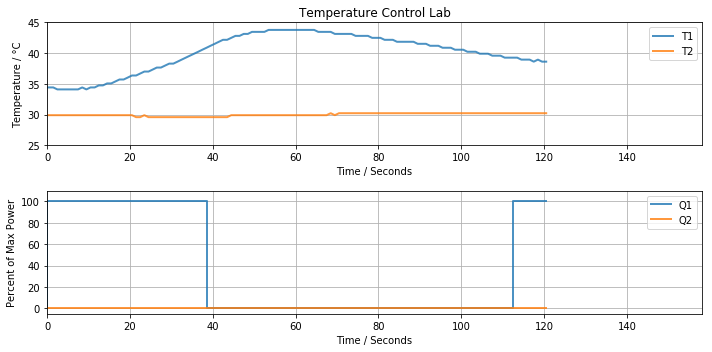

TCLab disconnected successfully.


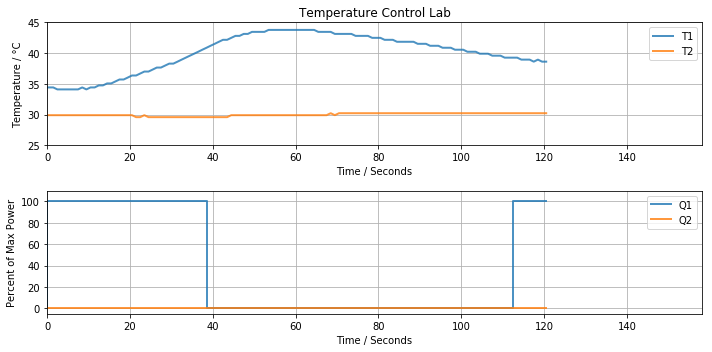

In [81]:
thermostat = relay()
thermostat.send(None)

with TCLab() as a:
    h = Historian(a)
    p = Plotter(h)
    for t in clock(120, strict=True):
        e1 = a.T1 - 40              # error signal
        Q1 = thermostat.send(e1)    # thermostat operation
        a.Q1(Q1)                    # set heater
        p.update()                  # update historian & plotter

## Demonstration of Hysterisis

### Test Signal

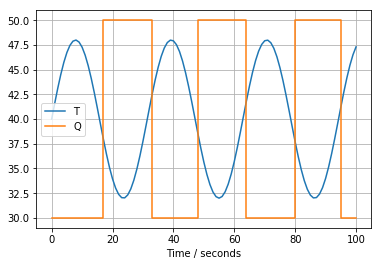

In [82]:
t = np.linspace(0,100,101)
Tsetpoint = 40
T = Tsetpoint + 8*np.sin(0.2*t)

thermostat = relay(1, 30, 50)
Q = thermostat.send(None)
Q = [thermostat.send(e) for e in T - Tsetpoint]

plt.plot(t, T)
plt.step(t, Q, where='post')
plt.xlabel('Time / seconds')
plt.legend(['T', 'Q'])
plt.grid()

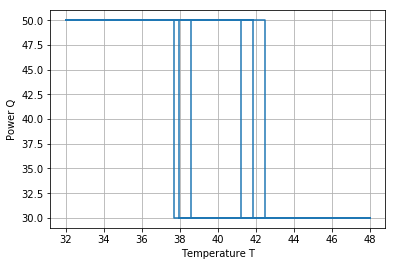

In [68]:
plt.step(T,Q, where='post')
plt.xlabel('Temperature T')
plt.ylabel('Power Q')
plt.grid()